In [737]:
# Do not change this cell
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

num_classes = 4
num_features = 2
random_seed = 1

# Create dataset
X, y = make_blobs(n_samples=10000, n_features=num_features, centers=num_classes, 
                  cluster_std=1.5, random_state=random_seed)

# Convert to tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

# Split dataset into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [702]:
# TODO: you will design your model here
class SimpleModel(nn.Module):
    def __init__(self, input_size, output_size):
        # TODO: implement this method
        super(SimpleModel, self).__init__()
        self.lin1 = nn.Linear(input_size, 84)
        self.lin2 = nn.Linear(84, output_size)
        
        self.activation = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # TODO: implement this method
        l1 = self.lin1(x)
        l2 = self.lin2(self.activation(l1))
        return self.sigmoid(l2.squeeze())

In [548]:
def train_step(model, X_train, y_train, loss_fn, optimizer, device):
    # TODO: implement one epoch of training
    X_train = X_train.to(device); y_train = y_train.to(device)
    scores = model(X_train)
    predictions = torch.argmax(scores, dim=1)

    loss = loss_fn(scores, y_train)
    accuracy = (torch.eq(predictions, y_train).sum().item() / len(y_train)) * 100

    model.zero_grad()
    loss.backward()
    optimizer.step()

    return (model, loss, accuracy)

In [549]:
def evaluation_step(model, X_test, y_test, loss_fn, device):
    # TODO: implement evaluation on test set
    X_test = X_test.to(device); y_test = y_test.to(device)
    
    with torch.inference_mode():
        scores = model(X_test)
        predictions = torch.argmax(scores, dim=1)

        loss = loss_fn(scores, y_test)
        accuracy = (torch.eq(predictions, y_test).sum().item() / len(y_test)) * 100
    
    return (loss, accuracy)


In [721]:
def train_simple_model(X_train, y_train, X_test, y_test, random_seed):
    # Make device
    device = "cpu" 
    if torch.cuda.is_available(): 
        device = "cuda"
    else:
        if torch.backends.mps.is_available():
            device = "mps" 
    
    torch.manual_seed(random_seed) # do not change this

    # TODO: write codes to train your model here
    model = SimpleModel(input_size=num_features, output_size=num_classes)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

    n_epochs = 2250

    train_loss = np.zeros(n_epochs)
    test_loss = np.zeros(n_epochs)
    train_accuracy = np.zeros(n_epochs)
    test_accuracy = np.zeros(n_epochs)
    
    for i in np.arange(n_epochs):
        model, train_loss[i], train_accuracy[i] = train_step(model, X_train, y_train, loss_fn, optimizer, device)
        test_loss[i], test_accuracy[i] = evaluation_step(model, X_test, y_test, loss_fn, device)
    return model, train_loss, train_accuracy, test_loss, test_accuracy

In [722]:
# TODO: plot accuracy curves
def plot_accuracy_performance(train_accuracies, test_accuracies):
    fig, ax1 = plt.subplots()
    
    ax1.plot(train_accuracies, c='r', label="accuracy train")
    ax1.plot(test_accuracies, c='b', label="accuracy test")
    ax1.set_title("Accuracy")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Accuracy")
    plt.legend()

    plt.savefig("plots/accuracy.jpg")

In [723]:
# TODO: plot loss curves
def plot_loss_performance(train_losses, test_losses):
    fig, ax1 = plt.subplots()

    ax1.plot(train_losses, c='r', label="logL train")
    ax1.plot(test_losses, c='b', label="logL test")
    ax1.set_title("Loss")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Loss")
    plt.legend()

    plt.savefig("plots/loss.jpg")

In [789]:
# TODO: plot decision boundary
def plot_decision_boundary(model, X_train, y_train):
    xx, yy = np.meshgrid(np.linspace(-20, 5, 100), np.linspace(-15, 12.5, 100))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    plt.colorbar()
    x1, y1 = xx.flatten(), yy.flatten()
    x2, y2 = x1.reshape(len(x1), 1), y1.reshape(len(y1), 1)
    grid = np.hstack([x2, y2])
    scores = model(torch.from_numpy(grid).float())
    predictions = torch.argmax(scores, dim=1)
    zz = predictions.reshape(xx.shape)
    plt.contourf(xx, yy, zz, alpha=0.4)

In [790]:
# Do not change this cell
model, train_losses, train_accuracies, test_losses, test_accuracies\
    = train_simple_model(X_train, y_train, X_test, y_test, random_seed)

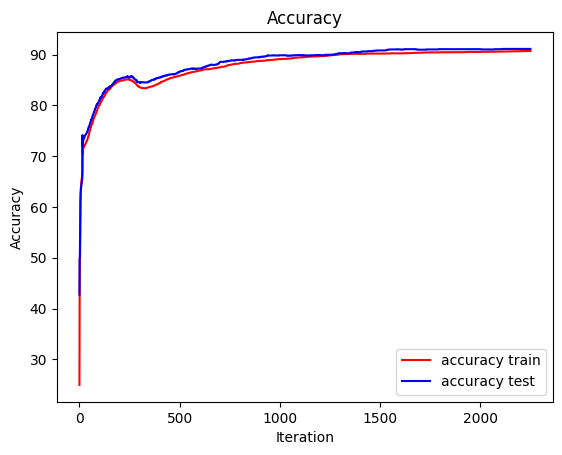

In [791]:
# Do not change this cell
plot_accuracy_performance(train_accuracies, test_accuracies)

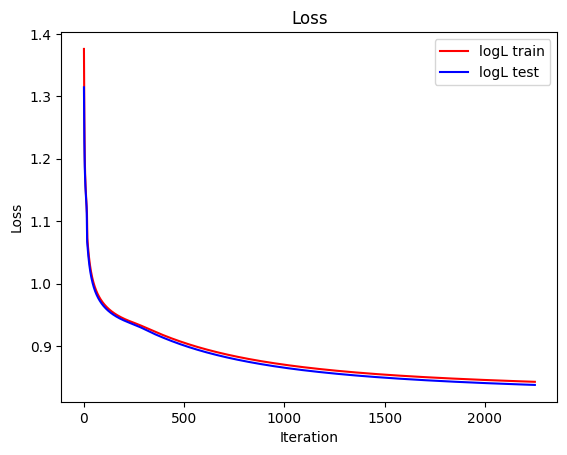

In [792]:
# Do not change this cell
plot_loss_performance(train_losses, test_losses)

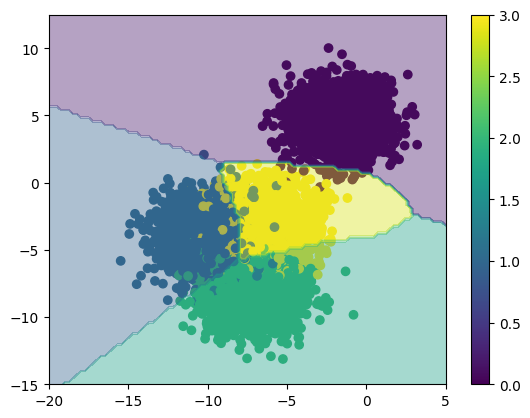

In [793]:
# Do not change this cell
plot_decision_boundary(model, X_train, y_train)